In [92]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from preprocess import preprocess
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv('../data/profiles_revised.csv')

cols = df.columns
cols

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [94]:
df = df.drop(columns=['ethnicity', 'religion', 'speaks', 'education', 'pets'])
cols = df.columns

In [95]:
df = preprocess(cols, df)
df = df.drop(columns=['diet_modifier', 'sign_modifier_extracted'])

In [96]:
df.head()

,age,body_type,diet,drinks,drugs,height,income,job,orientation,sex,smokes,status,offspring_status,offspring_future,sign_extracted
1,0.386157,2,3,2,2,0.427283,6,8,2,1,0,3,0,1,2
14,-0.351468,10,0,4,0,-1.596854,3,12,2,0,0,3,0,2,10
72,0.175407,1,0,4,2,1.186334,8,0,2,1,0,3,0,1,7
73,-0.246093,3,0,4,0,-1.849871,3,9,2,0,0,3,0,1,6
123,-1.089092,10,0,4,1,0.427283,11,10,2,1,1,3,0,0,8


In [97]:
lables = cosine_similarity(df)[0]

In [98]:
SIMILARITY_THRESHOLD = 0.67
lables = [0 if x < SIMILARITY_THRESHOLD else 1 for x in lables]

In [99]:
df['lables'] = lables

In [100]:
df.shape

(1686, 16)

In [101]:
#BEGIN = 50
#df = df.drop(df.index[BEGIN:])

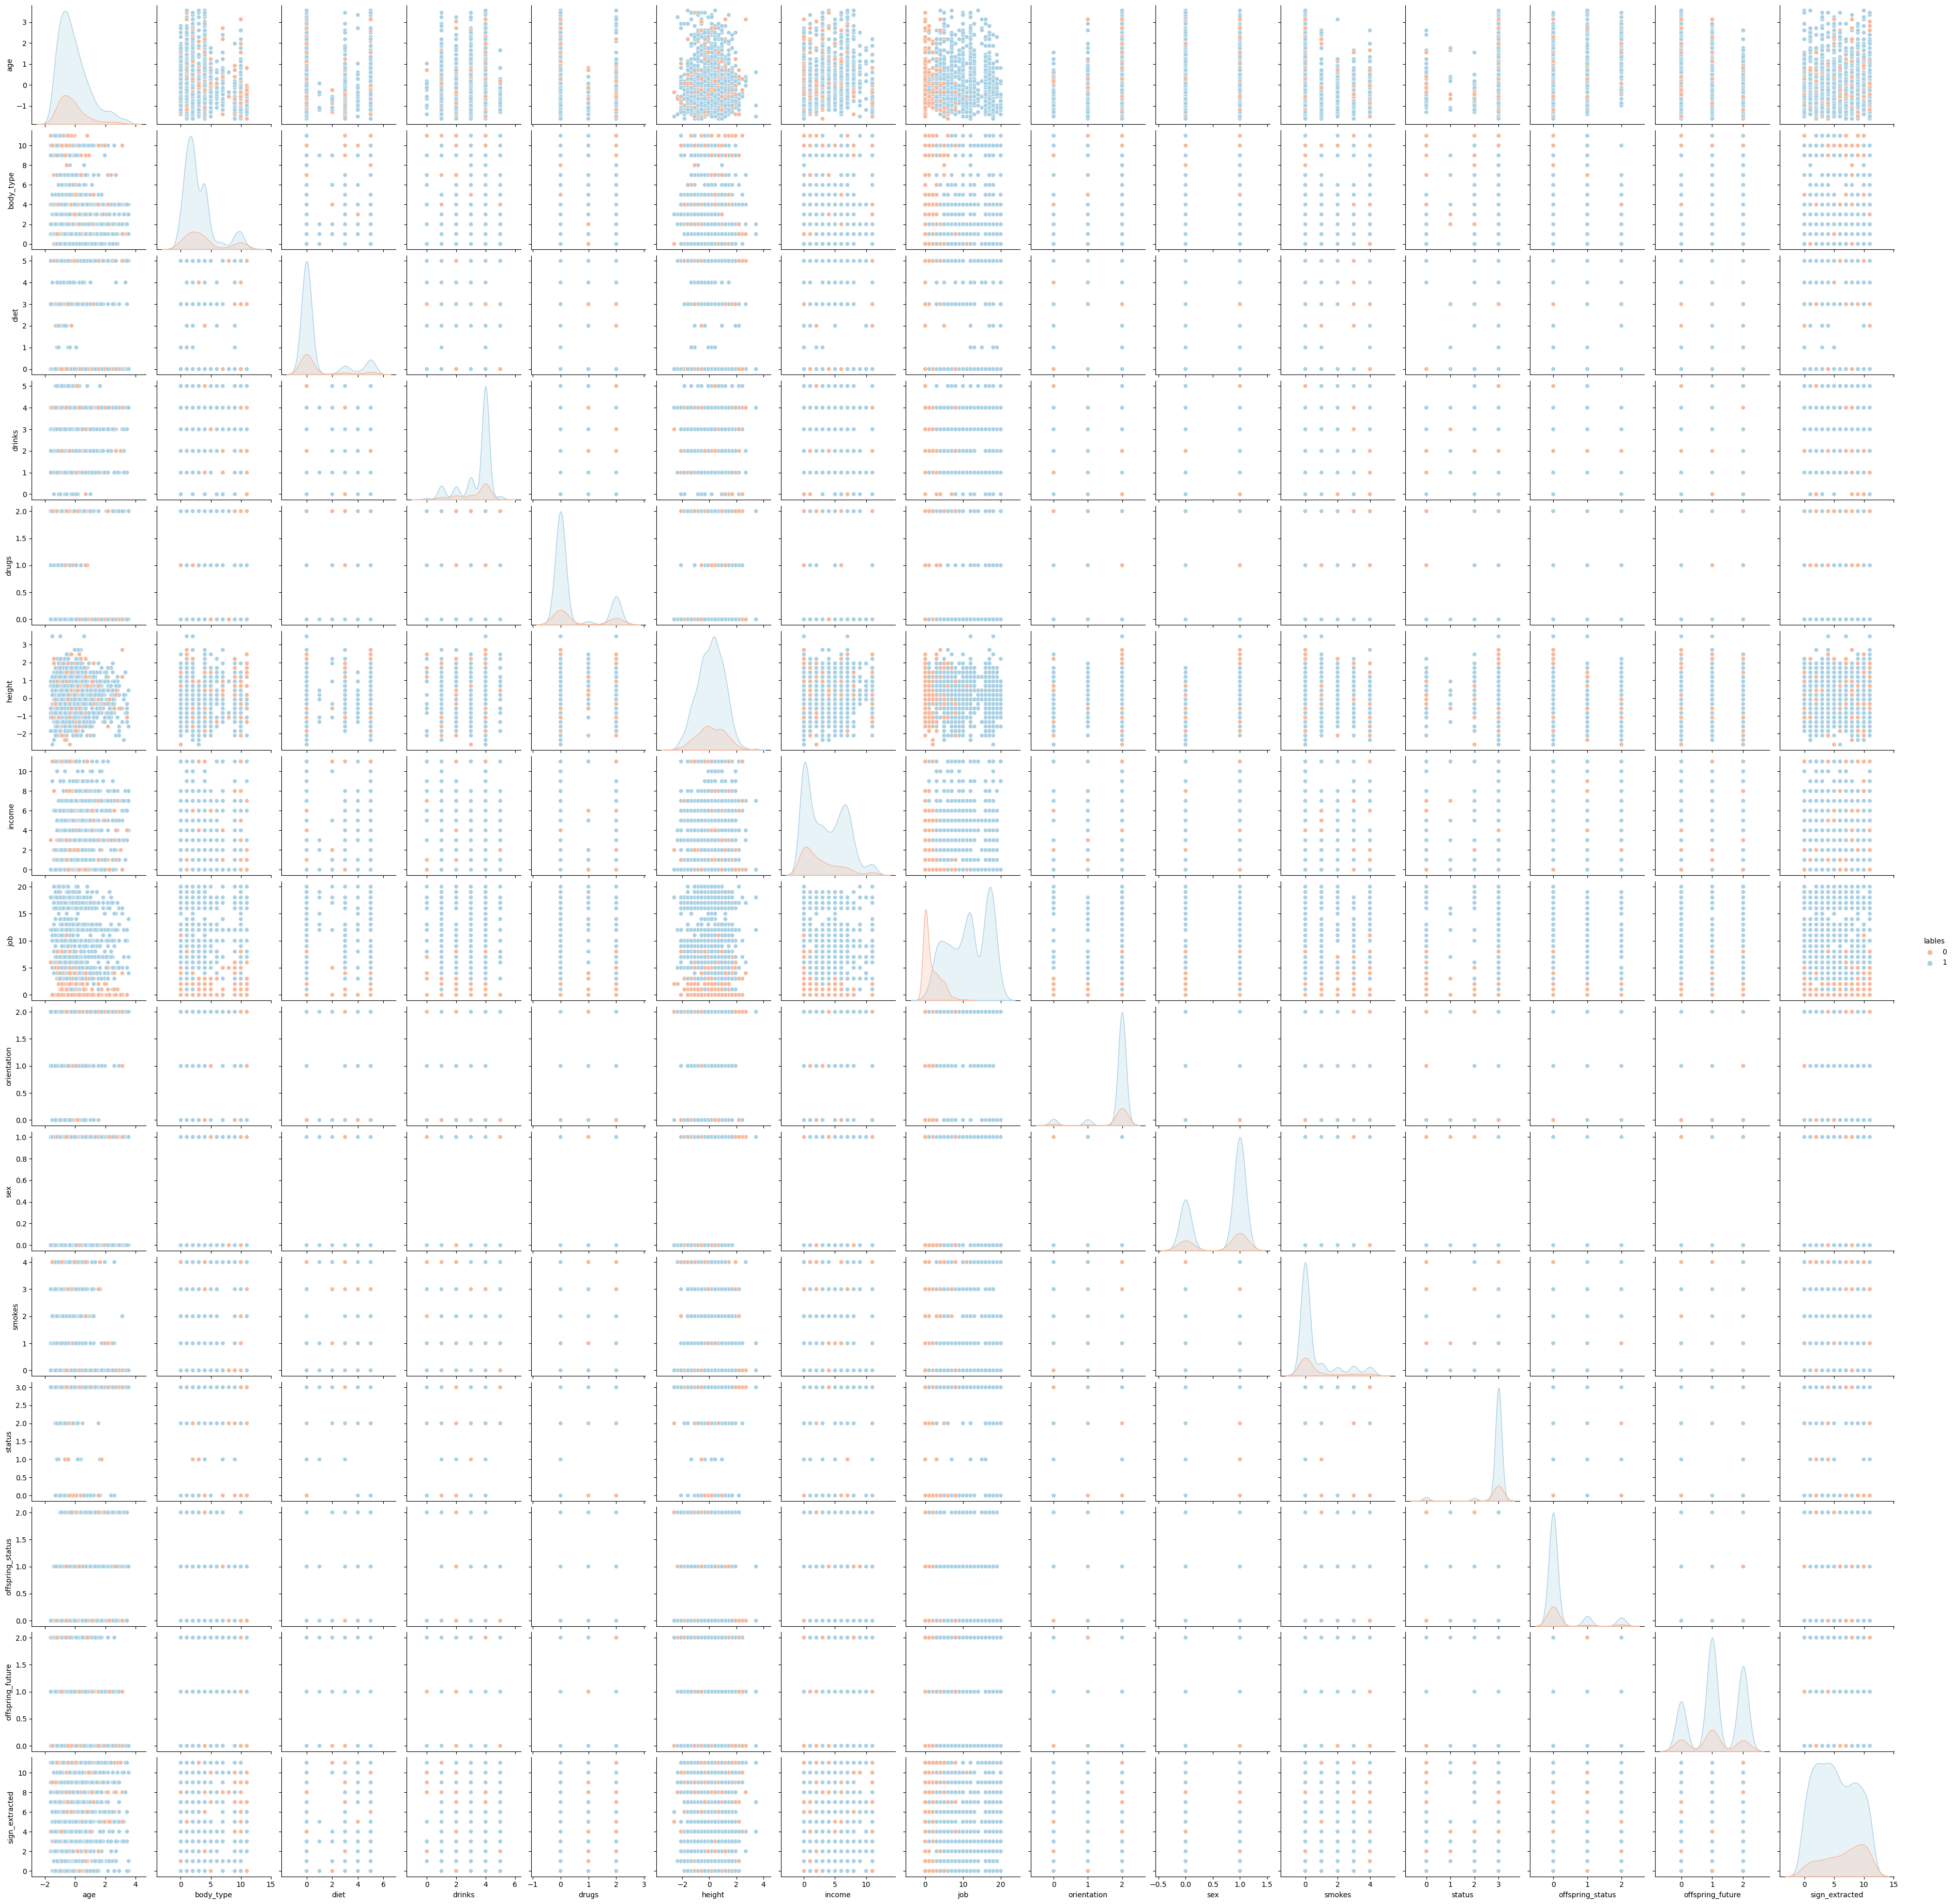

In [102]:
sns.pairplot(data=df, hue='lables', palette='RdBu')

In [103]:
y = df['lables']
df = df.drop(columns=['lables'])
X = df


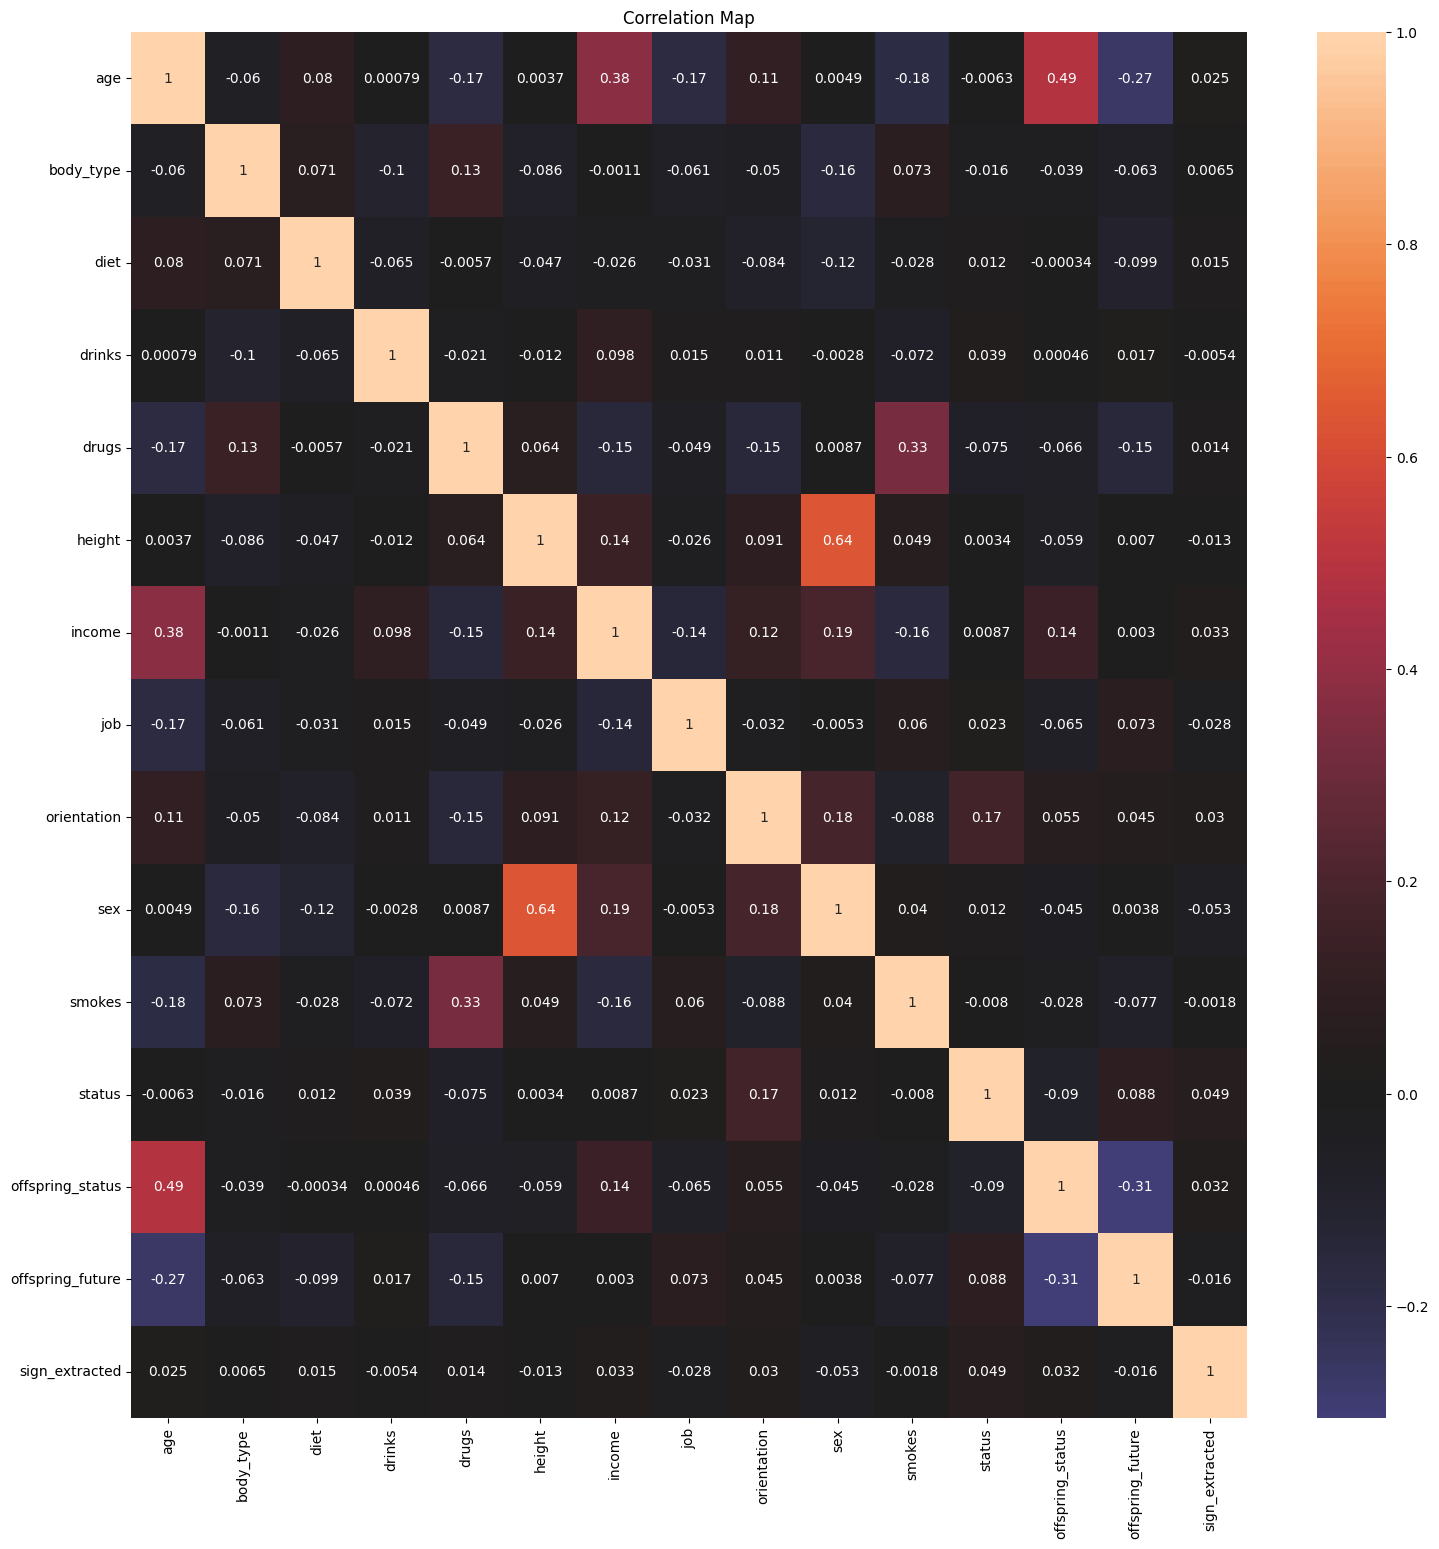

In [104]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title('Correlation Map')
plt.show()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape, '\t is the shape of the Training Features')
print(y_train.shape, '\t is the shape of the Training Lables')
print(X_test.shape, '\t is the shape of the Test Features')
print(y_test.shape, '\t is the shape of the Test Lables')



(1180, 15) 	 is the shape of the Training Features
(1180,) 	 is the shape of the Training Lables
(506, 15) 	 is the shape of the Test Features
(506,) 	 is the shape of the Test Lables


In [106]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [107]:
from sklearn.model_selection import cross_val_score


neighbors = []
cv_scores = []

for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.9704142  0.95857988 0.95266272 0.95266272 0.9704142  0.94674556
 0.95833333 0.94047619 0.93452381 0.93452381]


Optimal number of k neighbors = 27


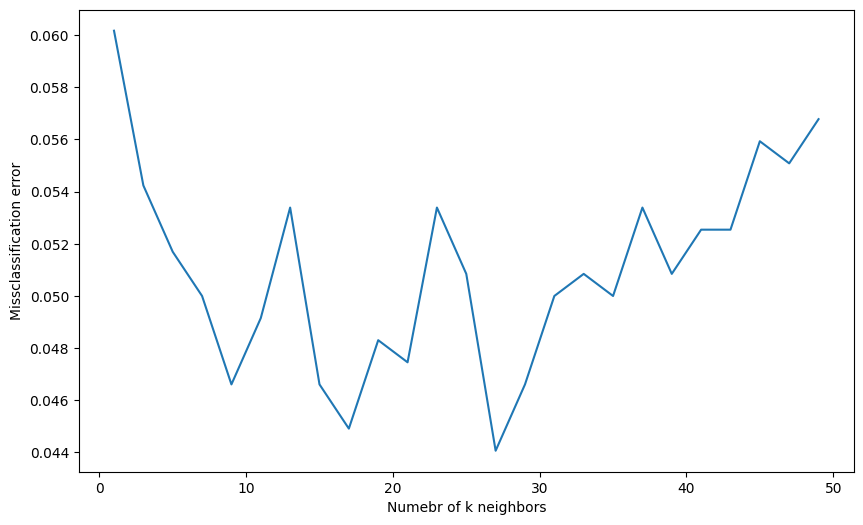

In [108]:
MSE = [1-x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('Optimal number of k neighbors = {}'.format(optimal_k))

plt.figure(figsize=(10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Numebr of k neighbors')
plt.ylabel('Missclassification error')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       102
           1       0.97      1.00      0.98       404

    accuracy                           0.97       506
   macro avg       0.97      0.94      0.96       506
weighted avg       0.97      0.97      0.97       506

Accuracy of similarity prediction using KNN = 97.23320158102767


Text(113.9222222222222, 0.5, 'Predicted class')

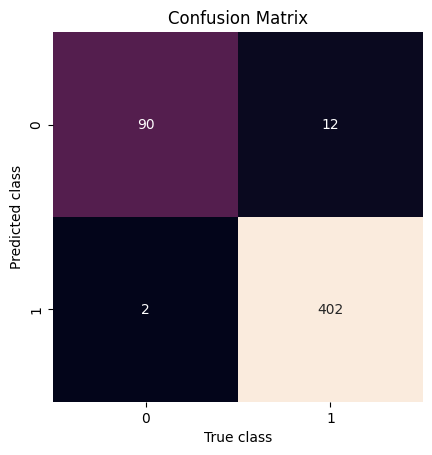

In [109]:
model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Accuracy of similarity prediction using KNN = {}'.format(accuracy_score(y_pred, y_test)*100))


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')

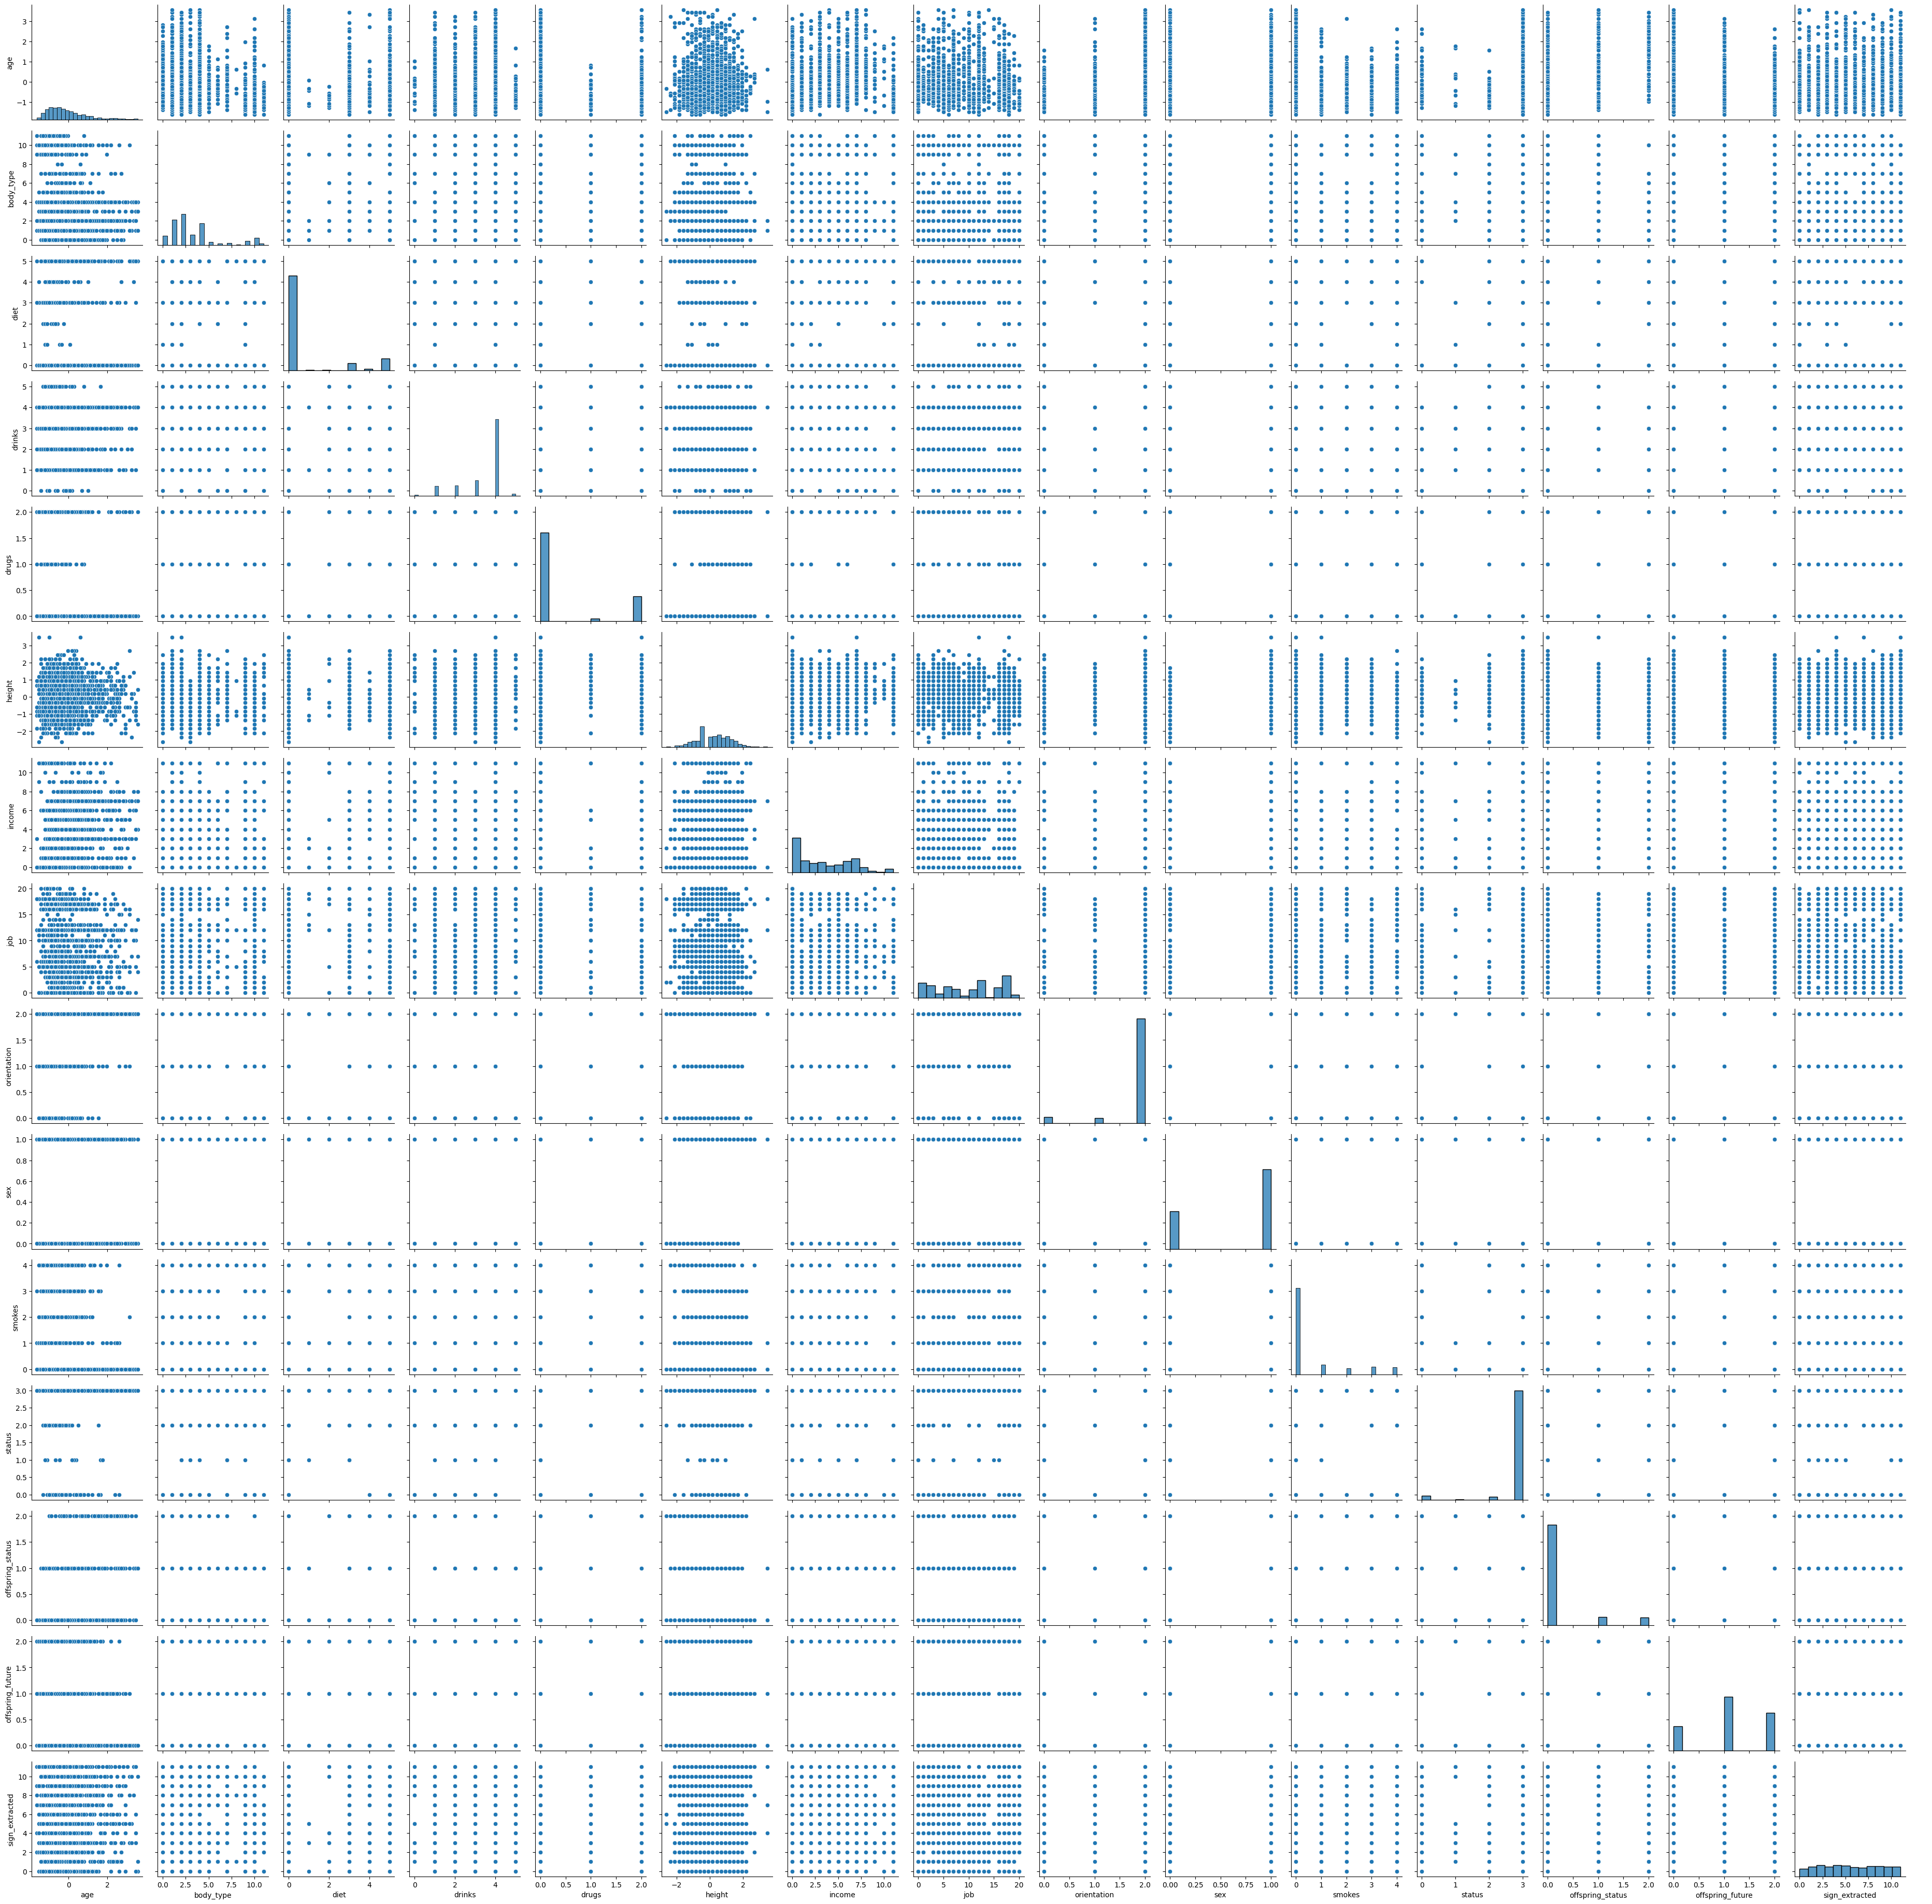

In [111]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

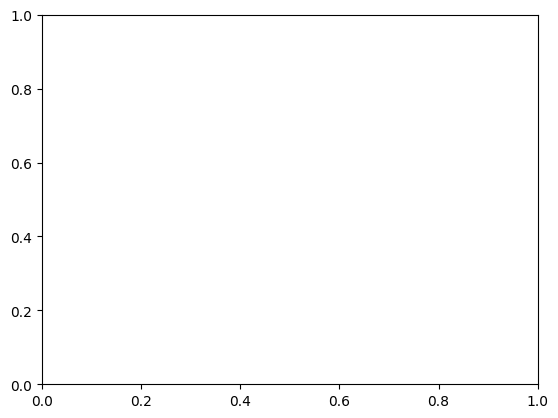

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 27

# import some data to play with

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset



# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=X['age'],
        ylabel=X['age'],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y['lables'],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()